# Demonstrate langgraph persistence to sqllite DB

In [1]:
from IPython.display import Image, display
from langchain_openai import ChatOpenAI
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from typing import Literal
from typing_extensions import TypedDict

## Define state that we are going to persist

In [2]:
class State(TypedDict):
    """State containing current count"""
    count: int

## Define nodes and edges

In [3]:
def inc_count(state):
    """Increment the count"""
    state['count'] += 1
    return state

def check_count(state: State) -> Literal["ask_user", "inc_count"]:
    """For every 10th iteration ask user whether to continue"""
    if state['count'] % 10 == 0:
        return "ask_user"
    return "inc_count"

def ask_user(_):
    """Ask user node"""
    pass

def prompt_user(_: State) -> Literal["__end__", "inc_count"]:
    """Prompt user whether he would like to continue"""
    to_continue = input("Do you want to continue?")
    if to_continue == 'y':
        return "inc_count"
    return "__end__"

## Define langgraph

In [4]:
graph = StateGraph(State)

### Define two nodes we will cycle between

In [5]:
graph.add_node("inc_count", inc_count)
graph.add_node("ask_user", ask_user)

### Set entry point to be inc_count

In [6]:
graph.set_entry_point("inc_count")

### Add conditional edges

In [7]:
graph.add_conditional_edges(
    # from node
    "inc_count",
    # function defining edge
    check_count
)
graph.add_conditional_edges(
    # from node
    "ask_user",
    # function defining edge
    prompt_user
)

## Use sqlite database for persistence

In [8]:
CONN_STRING="/Users/sameerm/AI-Agents/testDB.db"
persist = SqliteSaver.from_conn_string(CONN_STRING)

## Compile the graph passing the checkpointer for persistence

In [9]:
app = graph.compile(checkpointer=persist)

## Display the graph

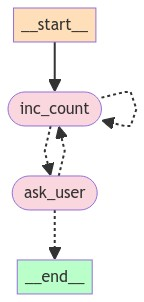

In [10]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Interct with the graph

In [ ]:
config = {"configurable": {"thread_id": "2"}}
for count in app.stream({"count": 0}, config, stream_mode="values"):
    print (count)

{'count': 0}
{'count': 1}
{'count': 2}
{'count': 3}
{'count': 4}
{'count': 5}
{'count': 6}
{'count': 7}
{'count': 8}
{'count': 9}
{'count': 10}


Do you want to continue? y


{'count': 11}
{'count': 12}
{'count': 13}
{'count': 14}
{'count': 15}
{'count': 16}
{'count': 17}
{'count': 18}
{'count': 19}
{'count': 20}


In [ ]:
print (app)

In [ ]:
print (count)